    Widereceiver 	
	number of receptions
	yards per reception
	number of fumbles
	yards per touchdown

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
qbdf20 = pd.read_csv("QBStats2020.csv")
qbdf19 = pd.read_csv("QBStats2019.csv")

In [6]:
QBMeasures20 = qbdf20[["Player Name","Fantasy Points","Interceptions","Passing Yards", "Passing TD","Fumbles","Passing Completions","Passing Attempts"]]
QBMeasures20



,Player Name,Fantasy Points,Interceptions,Passing Yards,Passing TD,Fumbles,Passing Completions,Passing Attempts
0,Josh Allen,433,15,4168,34,3,385,601
1,Tom Brady,423,12,4990,40,3,456,682
2,Justin Herbert,409,14,4631,35,1,409,608
3,Patrick Mahomes,399,13,4569,35,4,409,614
4,Matthew Stafford,382,15,4648,38,2,383,569
...,...,...,...,...,...,...,...,...
78,Logan Woodside,0,0,0,0,0,0,0
79,Jacob Eason,-1,1,25,0,0,2,5
80,Feleipe Franks,-2,1,0,0,0,0,1
81,John Wolford,-2,1,5,0,0,1,4


In [7]:
QBMeasures19 = qbdf19[["Player Name","Fantasy Points","Interceptions","Passing Yards", "Passing TD","Fumbles","Passing Completions","Passing Attempts"]]
QBMeasures19



,Player Name,Fantasy Points,Interceptions,Passing Yards,Passing TD,Fumbles,Passing Completions,Passing Attempts
0,Aaron Rodgers,468,5,4299,48,2,372,526
1,Josh Allen,460,10,4544,37,6,396,572
2,Patrick Mahomes,439,6,4740,38,2,390,588
3,Russell Wilson,428,13,4212,40,4,384,558
4,Deshaun Watson,421,7,4823,33,3,382,544
...,...,...,...,...,...,...,...,...
76,Tyler Bray,0,0,18,0,0,1,5
77,A.J. McCarron,0,0,20,0,0,1,1
78,Matt Schaub,0,0,0,0,0,0,0
79,Easton Stick,0,0,4,0,0,1,1


In [9]:
PassingYPTD20 = QBMeasures20['Passing Yards']/QBMeasures20['Passing TD']
PassingCPA20= QBMeasures20['Passing Completions']/QBMeasures20['Passing Attempts']
PassingYPTD19 = QBMeasures19['Passing Yards']/QBMeasures19['Passing TD']
PassingCPA19 = QBMeasures19['Passing Completions']/QBMeasures19['Passing Attempts']

In [10]:
QBMeasures20["Passing Yards Per TD"] = PassingYPTD20
QBMeasures19["Passing Yards Per TD"] = PassingYPTD19

<ipython-input-10-3433eef70e0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QBMeasures20["Passing Yards Per TD"] = PassingYPTD20
<ipython-input-10-3433eef70e0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QBMeasures19["Passing Yards Per TD"] = PassingYPTD19


In [11]:
QBMeasures20["Passing Completions Per Attempts"] = PassingCPA20
QBMeasures19["Passing Completions Per Attempts"] = PassingCPA19

<ipython-input-11-5e5f70f8bb96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QBMeasures20["Passing Completions Per Attempts"] = PassingCPA20
<ipython-input-11-5e5f70f8bb96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QBMeasures19["Passing Completions Per Attempts"] = PassingCPA19


In [137]:
QBMeasures20

,Player Name,Fantasy Points,Interceptions,Passing Yards,Passing TD,Fumbles,Passing Completions,Passing Attempts,Passing Yards Per TD,Passing Completions Per Attempts
0,Josh Allen,433,15,4168,34,3,385,601,122.588235,0.640599
1,Tom Brady,423,12,4990,40,3,456,682,124.750000,0.668622
2,Justin Herbert,409,14,4631,35,1,409,608,132.314286,0.672697
3,Patrick Mahomes,399,13,4569,35,4,409,614,130.542857,0.666124
4,Matthew Stafford,382,15,4648,38,2,383,569,122.315789,0.673111
...,...,...,...,...,...,...,...,...,...,...
78,Logan Woodside,0,0,0,0,0,0,0,NaN,NaN
79,Jacob Eason,-1,1,25,0,0,2,5,inf,0.400000
80,Feleipe Franks,-2,1,0,0,0,0,1,NaN,0.000000
81,John Wolford,-2,1,5,0,0,1,4,inf,0.250000


In [138]:
QBMeasuresFinal20 = QBMeasures20[['Player Name','Fantasy Points','Interceptions','Passing Yards Per TD','Fumbles','Passing Completions Per Attempts']]
QBMeasuresFinal19 = QBMeasures19[['Player Name','Fantasy Points','Interceptions','Passing Yards Per TD','Fumbles','Passing Completions Per Attempts']]


In [139]:
QBMeasuresFinal20 = QBMeasuresFinal20.set_index('Player Name')
QBMeasuresFinal19 = QBMeasuresFinal19.set_index('Player Name')

In [140]:
QBMeasuresFinal20.replace([np.inf, -np.inf], np.nan)

,Fantasy Points,Interceptions,Passing Yards Per TD,Fumbles,Passing Completions Per Attempts
Player Name,,,,,
Josh Allen,433,15,122.588235,3,0.640599
Tom Brady,423,12,124.750000,3,0.668622
Justin Herbert,409,14,132.314286,1,0.672697
Patrick Mahomes,399,13,130.542857,4,0.666124
Matthew Stafford,382,15,122.315789,2,0.673111
...,...,...,...,...,...
Logan Woodside,0,0,NaN,0,NaN
Jacob Eason,-1,1,NaN,0,0.400000
Feleipe Franks,-2,1,NaN,0,0.000000


In [141]:
QBMeasuresFinal19.replace([np.inf, -np.inf], np.nan)

,Fantasy Points,Interceptions,Passing Yards Per TD,Fumbles,Passing Completions Per Attempts
Player Name,,,,,
Aaron Rodgers,468,5,89.562500,2,0.707224
Josh Allen,460,10,122.810811,6,0.692308
Patrick Mahomes,439,6,124.736842,2,0.663265
Russell Wilson,428,13,105.300000,4,0.688172
Deshaun Watson,421,7,146.151515,3,0.702206
...,...,...,...,...,...
Tyler Bray,0,0,NaN,0,0.200000
A.J. McCarron,0,0,NaN,0,1.000000
Matt Schaub,0,0,NaN,0,NaN


In [142]:
QBMeasuresFinal20 = QBMeasuresFinal20.fillna(0)
QBMeasuresFinal19 = QBMeasuresFinal19.fillna(0)

In [143]:
QBMData = pd.merge(QBMeasuresFinal20, QBMeasuresFinal19, on="Player Name",how="outer")
QBMData.columns

Index(['Fantasy Points_x', 'Interceptions_x', 'Passing Yards Per TD_x',
       'Fumbles_x', 'Passing Completions Per Attempts_x', 'Fantasy Points_y',
       'Interceptions_y', 'Passing Yards Per TD_y', 'Fumbles_y',
       'Passing Completions Per Attempts_y'],
      dtype='object')

In [144]:
QBMD = QBMData.rename(columns={
    'Fantasy Points_x':'Fantasy Points 2020', 'Interceptions_x':'Interceptions 2020',
    'Passing Yards Per TD_x':'Passing Yards Per TD 2020','Fumbles_x':'Fumbles 2020',
    'Passing Completions Per Attempts_x':'Passing Completions Per Attempts 2020', 
    'Fantasy Points_y':'Fantasy Points 2019','Interceptions_y':'Interceptions 2019', 
    'Passing Yards Per TD_y':'Passing Yards Per TD 2019', 'Fumbles_y':'Fumbles 2019',
    'Passing Completions Per Attempts_y':'Passing Completions Per Attempts 2019'})


In [145]:
QBMD.head()

,Fantasy Points 2020,Interceptions 2020,Passing Yards Per TD 2020,Fumbles 2020,Passing Completions Per Attempts 2020,Fantasy Points 2019,Interceptions 2019,Passing Yards Per TD 2019,Fumbles 2019,Passing Completions Per Attempts 2019
Player Name,,,,,,,,,,
Josh Allen,433.0,15.0,122.588235,3.0,0.640599,460.0,10.0,122.810811,6.0,0.692308
Tom Brady,423.0,12.0,124.750000,3.0,0.668622,408.0,12.0,115.825000,1.0,0.657377
Justin Herbert,409.0,14.0,132.314286,1.0,0.672697,384.0,10.0,139.870968,1.0,0.665546
Patrick Mahomes,399.0,13.0,130.542857,4.0,0.666124,439.0,6.0,124.736842,2.0,0.663265
Matthew Stafford,382.0,15.0,122.315789,2.0,0.673111,301.0,10.0,157.076923,1.0,0.642045


In [146]:
QBMD20 = QBMeasuresFinal20
QBMD19 = QBMeasuresFinal19

In [147]:
QBMD = QBMD.replace([np.inf, -np.inf], np.nan)
QBMD = QBMD.fillna(0)

In [148]:
QBMD20 = QBMD20.replace([np.inf, -np.inf], np.nan)
QBMD20 = QBMD20.fillna(0)

In [149]:
QBMD19 = QBMD19.replace([np.inf, -np.inf], np.nan)
QBMD19 = QBMD19.fillna(0)

In [151]:
QBMD19

,Fantasy Points,Interceptions,Passing Yards Per TD,Fumbles,Passing Completions Per Attempts
Player Name,,,,,
Aaron Rodgers,468,5,89.562500,2,0.707224
Josh Allen,460,10,122.810811,6,0.692308
Patrick Mahomes,439,6,124.736842,2,0.663265
Russell Wilson,428,13,105.300000,4,0.688172
Deshaun Watson,421,7,146.151515,3,0.702206
...,...,...,...,...,...
Tyler Bray,0,0,0.000000,0,0.200000
A.J. McCarron,0,0,0.000000,0,1.000000
Matt Schaub,0,0,0.000000,0,0.000000


In [83]:
#Start Model

In [152]:
y_train = QBMD19['Fantasy Points']
x_train = QBMD19.drop('Fantasy Points',1)

In [153]:
#Scale Dataset for ratio purposes and simplification in Model
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)

In [154]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [155]:
#Fitting of Model with 2019 QB Data
model.fit(X_train_scaled,y_train)
training_score = model.score(X_train_scaled,y_train)
training_score

0.6923631112213606

In [156]:
# Test with 2020 QB Data
y_test = QBMD20['Fantasy Points']
x_test = QBMD20.drop('Fantasy Points',1)
x_test_scaled = X_scaler.transform(x_test)

In [157]:
testing_score = model.score(x_test_scaled,y_test)
testing_score

0.6781796294618199

In [158]:
predict = model.predict(x_test_scaled)
predict

array([398.57795261, 333.58406262, 336.43177791, 374.29417558,
       381.78514895,  98.6998007 , 358.81435145, 349.33594789,
       220.8760313 , 198.8461536 , 222.36543808, 213.58236654,
       394.80225557, 338.25389416, 377.13520315, 113.00523798,
       302.12718193, 273.59468485, 292.44683157, 368.26121609,
       311.79851984, 168.94075784, 290.20169573, 335.191232  ,
       418.15583017, 237.02106584, 186.40495376, 268.98504245,
       217.66965076, 232.37994775,  95.02046226, 281.79798108,
        60.51375359,  83.09788348, 111.47412087,  91.1696609 ,
       163.57125792,  38.06456694, 113.76351312,  40.99252712,
        44.0517559 ,  48.4624655 , 165.16745733,  21.16703947,
       255.63946312,  13.80813901,  39.46939762, 122.7653736 ,
        25.1082251 ,  18.50303818, -28.54164466, -21.87173076,
       -44.5844712 ,  13.83037983,  -8.83814422,  -4.31347441,
       -19.26916584,  -2.09435976,  21.95019662, -28.88539567,
        36.223925  ,   7.90175906,  65.60875857,  35.28

In [160]:
QBMD20["predict"] = predict
QBMD20["MSE"] = QBMD20["predict"] - QBMD20["Fantasy Points"]
QBMD20

,Fantasy Points,Interceptions,Passing Yards Per TD,Fumbles,Passing Completions Per Attempts,predict,MSE
Player Name,,,,,,,
Josh Allen,433,15,122.588235,3,0.640599,398.577953,-34.422047
Tom Brady,423,12,124.750000,3,0.668622,333.584063,-89.415937
Justin Herbert,409,14,132.314286,1,0.672697,336.431778,-72.568222
Patrick Mahomes,399,13,130.542857,4,0.666124,374.294176,-24.705824
Matthew Stafford,382,15,122.315789,2,0.673111,381.785149,-0.214851
...,...,...,...,...,...,...,...
Logan Woodside,0,0,0.000000,0,0.000000,-28.885396,-28.885396
Jacob Eason,-1,1,0.000000,0,0.400000,33.891218,34.891218
Feleipe Franks,-2,1,0.000000,0,0.000000,-6.476561,-4.476561


In [161]:
UInterception = input("What is the Player Interception for this season?")
UPYPTD = input("What is the Player Passing Yard Per TD for this season?")
UFumbles = input("How many times did this Player Fumble this season?")
UPCPA = input("What is the Player Passing Completion Per Attempt this season?")
UInterception = int(UInterception)
UPYPTD = float(UPYPTD)
UFumbles = int(UFumbles)
UPCPA = float(UPCPA)

What is the Player Interception for this season?13
What is the Player Passing Yard Per TD for this season?120
How many times did this Player Fumble this season?2
What is the Player Passing Completion Per Attempt this season?0.65


In [162]:
datadict = {
    "Interceptions": UInterception,
    "Passing Yards Per TD": UPYPTD,
    "Fumbles": UFumbles,
    "Passing Completion Per Attempts": UPCPA
}

xdf = pd.DataFrame([datadict])
xdf_scaled = X_scaler.transform(xdf)

In [163]:
Final = model.predict(xdf_scaled)
Final

array([335.27300193])

In [164]:
import pickle 

In [165]:
# save the model to disk
filename = 'QuaterbackModel_trained.sav'
pickle.dump(model, open(filename, 'wb'))

In [166]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test_scaled, y_test)
newguypoint = loaded_model.predict(xdf_scaled)

print(result)
print(newguypoint)

0.6781796294618199
[335.27300193]


In [33]:
model = KMeans(n_clusters =3, random_state =5)

In [34]:
model.fit(QBMD19)

KMeans(n_clusters=3, random_state=5)

In [35]:
predictions = model.predict(QBMD19)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [36]:
QBMD19["class"] = model.labels_
QBMD19.head()

,Fantasy Points,Interceptions,Passing Yards Per TD,Fumbles,Passing Completions Per Attempts,class
Player Name,,,,,,
Aaron Rodgers,468,5,89.562500,2,0.707224,2
Josh Allen,460,10,122.810811,6,0.692308,2
Patrick Mahomes,439,6,124.736842,2,0.663265,2
Russell Wilson,428,13,105.300000,4,0.688172,2
Deshaun Watson,421,7,146.151515,3,0.702206,2


<function matplotlib.pyplot.show(close=None, block=None)>

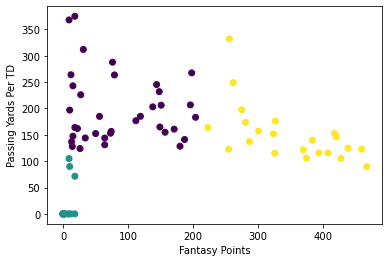

In [37]:
plt.scatter(x=QBMD19["Fantasy Points"], y=QBMD19['Passing Yards Per TD'], c=QBMD19['class'])
plt.xlabel('Fantasy Points')
plt.ylabel('Passing Yards Per TD')
plt.show


In [38]:
inertia = []
k = list(range(1, 11))


for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(QBMD19)
    inertia.append(km.inertia_)

In [39]:
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

,k,inertia
0,1,2.500205e+06
1,2,1.062369e+06
2,3,5.081599e+05
3,4,3.209720e+05
4,5,2.115548e+05
5,6,1.494984e+05
6,7,1.122069e+05
7,8,9.441906e+04
8,9,7.958678e+04
9,10,6.764392e+04


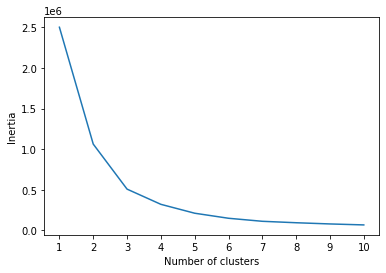

In [40]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Clusters

In [41]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [42]:
clusters19 = get_clusters(4, QBMD19)
clusters20 = get_clusters(4, QBMD20)

In [43]:
clusters19.head(5)

,Fantasy Points,Interceptions,Passing Yards Per TD,Fumbles,Passing Completions Per Attempts,class
Player Name,,,,,,
Aaron Rodgers,468,5,89.562500,2,0.707224,0
Josh Allen,460,10,122.810811,6,0.692308,0
Patrick Mahomes,439,6,124.736842,2,0.663265,0
Russell Wilson,428,13,105.300000,4,0.688172,0
Deshaun Watson,421,7,146.151515,3,0.702206,0


In [44]:
clusters20.head(5)

,Fantasy Points,Interceptions,Passing Yards Per TD,Fumbles,Passing Completions Per Attempts,class
Player Name,,,,,,
Josh Allen,433,15,122.588235,3,0.640599,1
Tom Brady,423,12,124.750000,3,0.668622,1
Justin Herbert,409,14,132.314286,1,0.672697,1
Patrick Mahomes,399,13,130.542857,4,0.666124,1
Matthew Stafford,382,15,122.315789,2,0.673111,1


In [45]:
def show_clusters19(df):
    plt.scatter(x=QBMD19["Fantasy Points"], y=QBMD19['Passing Yards Per TD'],c=QBMD19['class'])
    plt.xlabel('Fantasy Points')
    plt.ylabel('Passing Yards Per TD')
    plt.show()

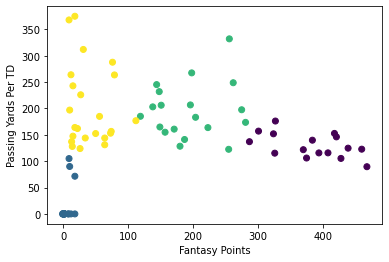

In [46]:
show_clusters19(clusters19)

In [47]:
def show_clusters20(df):
    plt.scatter(x=QBMD20["Fantasy Points"], y=QBMD20['Passing Yards Per TD'],c=QBMD20['class'])
    plt.xlabel('Fantasy Points')
    plt.ylabel('Passing Yards Per TD')
    plt.show()

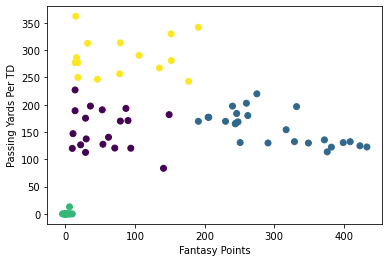

In [48]:
show_clusters20(clusters20)

In [ ]:
#Hierarchical Clustering

In [ ]:
normalized = normalize(QBMD19)

In [ ]:
mergings = linkage(normalized, method='ward')

In [ ]:
plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

In [ ]:
merge_dfHC = pd.DataFrame(normalized)
merge_dfHC.columns = merge_df.columns

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2,
                                 affinity='euclidean',
                                 linkage='ward')
labels = cluster.fit_predict(merge_dfHC)

In [ ]:
#ActualModel

In [ ]:
merge_df